<a href="https://colab.research.google.com/github/shkangg/examples/blob/master/itslab_mnist_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#사용할 라이브러리 추가

from tensorflow.keras.models import Sequential         #순차적 신경망 구성 불러옴
from tensorflow.keras.layers import Dense, Activation  #dense로 뉴런 수, activation으로 활성화 함수 설정
from tensorflow.keras.utils import to_categorical      #one-hot incoding 지원(0또는 1로 표현) (ex: 2=[0,1,0,0,0,0,0,0,0])
from tensorflow.keras.datasets import mnist            #mnist dataset을 불러옴
import numpy as np                                     #인공 신경망 구성에 유리한 numpy 배열 사용
import matplotlib.pyplot as plt                         #결과를 그래프를 통한 그림으로 표현하게 해줌


In [ ]:
#mnist 데이터셋 불러오기

(x_train,y_train),(x_test,y_test)=mnist.load_data() 
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x_test shape",x_test.shape)
print("y_test shape",y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
X_train=x_train.reshape(60000,784)
X_test=x_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255
print("X traing matrix shape",X_train.shape)
print("X testing matrix shape",X_test.shape)

X traing matrix shape (60000, 784)
X testing matrix shape (10000, 784)


In [ ]:
Y_train=to_categorical(y_train,10)
Y_test=to_categorical(y_test,10)
print("Y traing matrix shape",Y_train.shape)
print("Y testing matrix shape",Y_test.shape)

Y traing matrix shape (60000, 10)
Y testing matrix shape (10000, 10)


In [ ]:
model=Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trai

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,batch_size=128,epochs=10,verbose=1)

Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 0.2268 - accuracy: 0.9336
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0826 - accuracy: 0.9747
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0517 - accuracy: 0.9835
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0372 - accuracy: 0.9883
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0223 - accuracy: 0.9924
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0187 - accuracy: 0.9939
Epoch 8/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 9/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0144 - accura

In [ ]:
score=model.evaluate(X_test,Y_test)
print('Test score:',score[0])
print('Test accuracy:',score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0847 - accuracy: 0.9814
Test score: 0.08474553376436234
Test accuracy: 0.9814000129699707


In [ ]:
predicted_classes=np.argmax(model.predict(X_test),axis=1)
correct_indices=np.nonzero(predicted_classes==y_test)[0]
incorrect_indices=np.nonzero(predicted_classes!=y_test)[0]

313/313 [==============================] - 2s 4ms/step


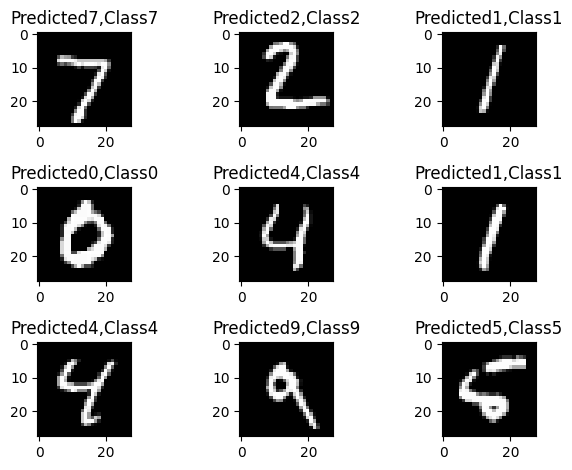

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct=correct_indices[i]
  plt.imshow(X_test[correct].reshape(28,28),cmap='gray')
  plt.title("Predicted{},Class{}".format(predicted_classes[correct],y_test[correct]))
plt.tight_layout()

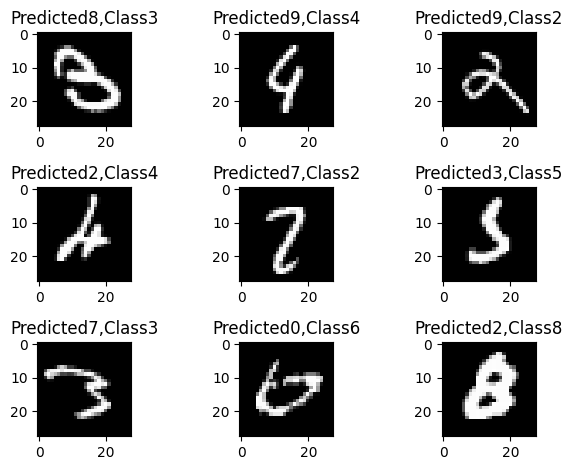

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect=incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28),cmap='gray')
  plt.title("Predicted{},Class{}".format(predicted_classes[incorrect],y_test[incorrect]))
plt.tight_layout()

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
from os import path
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive/')

from PIL import Image

Mounted at /content/gdrive/


In [ ]:
!cd gdrive; ls; cd 'My Drive'; ls;

MyDrive
 1681286530423.jpg
'2023 ITS 부트캠프 1기 만족도 조사.gform'
 4손.jpg
 5손.jpg
 8draw.psd
 8.jpg
 cafe_paper8.jpg
'cafe_paper8.jpg의 사본'
'Catch-up  신청서 파이썬 2019036058 강승훈.pdf'
'Catch-Up 자바 신청서 2019036058 강승훈.pdf'
'ch14_파이썬으로 포토샵 만들기.pptx'
'Colab Notebooks'
 KakaoTalk_20221201_043745517.jpg
 Notes_230307_152608.pdf
 paper8.jpg
 plate5.png
 plate7.png
 Screenshot_20230412_153223.jpg
'Untitled0.ipynb의 사본'
 writtenbyme8.jpg
'정보통신공학부 2019036058 강승훈 트랙 신청서.pdf'
 카페종이4.jpg
 카페종이7.jpg


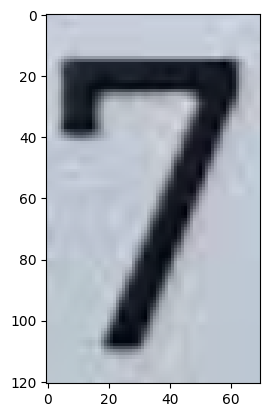

In [ ]:
im= Image.open('./gdrive/My Drive/plate7.png')

plt.imshow(im)

In [ ]:
im=im.resize((28,28))
im=np.array(im)
im.shape

(28, 28, 4)

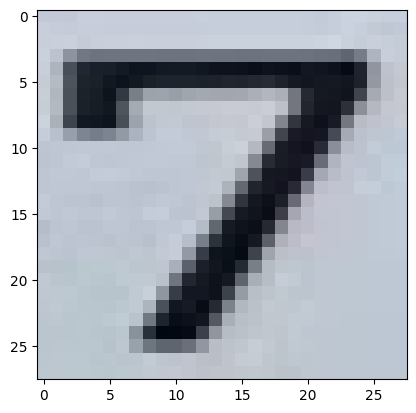

In [ ]:
plt.imshow(im)

In [ ]:
trans_im=im.transpose(2,0,1)
trans_im.shape

(4, 28, 28)

In [ ]:
trans_test_im=trans_im[0].reshape(1,28,28)
trans_test_im.shape

(1, 28, 28)

In [ ]:
trans_test_im=trans_test_im.reshape(1,28*28)
trans_test_im=trans_test_im.astype('float32')/255
trans_test_im.shape

(1, 784)

In [ ]:
a=model.predict(trans_test_im)
print("예측 결과는 : ",np.argmax(a))

1/1 [==============================] - 0s 21ms/step
예측 결과는 :  5
